# Task 3

#### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
tf.device("/gpu:0")

#### Define Methods

In [2]:
def evaluate(testSet, testLabels, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testSet, testLabels, verbose=2) 
    print("ACCURACY: " + str(test_acc))

def resizeAndShiftHorizontal(width_shift_val, xDataSet, yDataset, label):
    datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=0)
    
    new_shape = (56,56)
    returnDataSet = np.zeros(shape=(xDataSet.shape[0],)+new_shape)
    for idx in range(xDataSet.shape[0]):
        yStart = 28
        yEnd = 56
        if label == 'TRAIN':
            yStart = 0
            yEnd = 28
                
        returnDataSet[idx][ yStart:yEnd, 14: 14 + 28] = xDataSet[idx]

    # define number of rows & columns
    num_row = 2
    num_col = 8
    num= num_row*num_col

    # plot before
    print(label + ' BEFORE:\n')
    fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes1[i//num_col, i%num_col]
         ax.imshow(returnDataSet[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(yDataset[i]))
    plt.tight_layout()
    plt.show()

    # plot after
    print(label + ' AFTER:\n')
    fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for X, Y in datagen.flow(returnDataSet.reshape(returnDataSet.shape[0], 56, 56, 1),yDataset.reshape(yDataset.shape[0], 1),batch_size=num,shuffle=False):
         for i in range(0, num):
              ax = axes2[i//num_col, i%num_col]
              ax.imshow(X[i].reshape(56,56), cmap='gray_r')
              ax.set_title('Label: {}'.format(int(Y[i])))
         break
    plt.tight_layout()
    plt.show()
    return returnDataSet


#### Load MNIST Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

#### Building a Training Pipline

TRAIN BEFORE:



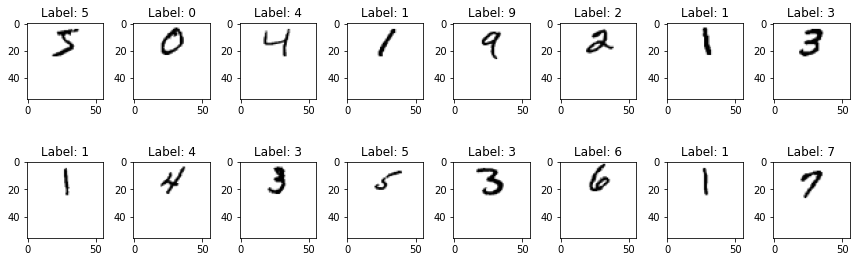

TRAIN AFTER:



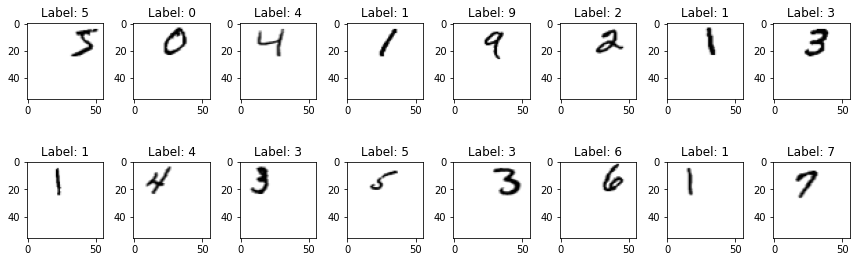

In [4]:
ds_train = resizeAndShiftHorizontal(0.25, train_images, train_labels, "TRAIN")
ds_train = ds_train.reshape(-1, 56, 56, 1)

#### Building an Evaluation Pipeline

TEST BEFORE:



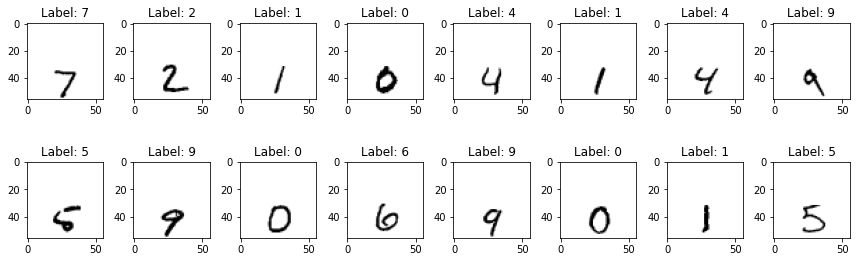

TEST AFTER:



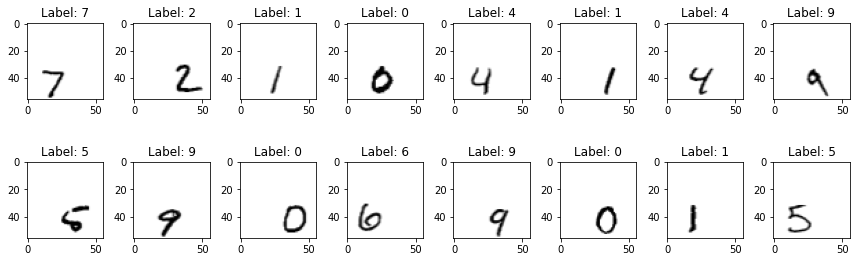

In [5]:
ds_test = resizeAndShiftHorizontal(0.25, test_images, test_labels, "TEST")
ds_test = ds_test.reshape(-1, 56, 56, 1)

#### Create and Train the Model

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(ds_train, train_labels, epochs=5, 
                    validation_data=(ds_test, test_labels))

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 0.1329 - accuracy: 0.9579 - val_loss: 4.5661 - val_accuracy: 0.1230
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 8.7260 - val_accuracy: 0.1091
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9905 - val_loss: 6.0935 - val_accuracy: 0.0934
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 7.9843 - val_accuracy: 0.1111
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 8.8301 - val_accuracy: 0.1089


#### Evaluate the Model

313/313 - 0s - loss: 8.8301 - accuracy: 0.1089
ACCURACY: 0.10890000313520432


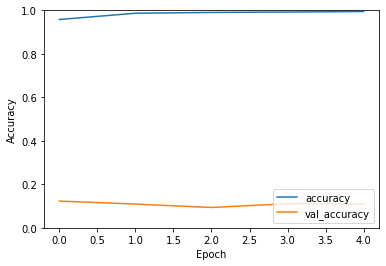

In [7]:
evaluate(ds_test, test_labels, model)